In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

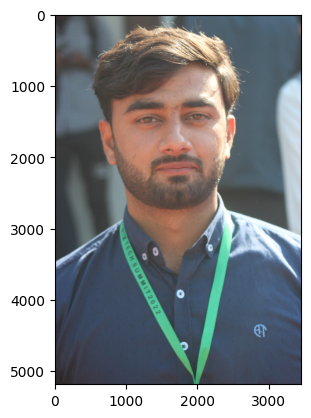

In [2]:
img1 = cv2.imread('IMG_1.JPG')
plt.imshow(img1[:,:,::-1])

In [3]:
result = DeepFace.analyze(img1,actions=['race'])

In [5]:
print(result)

[{'race': {'asian': 0.11762077457060066, 'indian': 0.005053051364627003, 'black': 0.0011083168580031757, 'white': 96.6489789872753, 'middle eastern': 0.7057195949983356, 'latino hispanic': 2.521521375866018}, 'dominant_race': 'white', 'region': {'x': 2169, 'y': 2931, 'w': 73, 'h': 73, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.95}, {'race': {'asian': 3.411465172346255, 'indian': 21.92090415011694, 'black': 2.4791610588623354, 'white': 13.62839652638394, 'middle eastern': 19.87197338008563, 'latino hispanic': 38.688106976521844}, 'dominant_race': 'latino hispanic', 'region': {'x': 761, 'y': 774, 'w': 1794, 'h': 1794, 'left_eye': (1925, 1451), 'right_eye': (1328, 1475)}, 'face_confidence': 0.94}]


In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Load the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Set up the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop through the detected faces
    for (x, y, w, h) in faces:
        # Crop the face region
        face_image = frame[y:y+h, x:x+w]

        # Analyze the ethnicity of the face
        result = DeepFace.analyze(face_image, actions=['race'],enforce_detection=False)

        # Extract the ethnicity probabilities
        ethnicity_probs = result[0]['race']

        # Find the dominant ethnicity
        dominant_ethnicity = max(ethnicity_probs, key=ethnicity_probs.get)

        # Draw a rectangle around the face and label it with the dominant ethnicity
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, dominant_ethnicity, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the dominant ethnicity label on top of the bounding box
        cv2.putText(frame, dominant_ethnicity, (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Webcam', frame)

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and destroy all windows
cap.release()
cv2.destroyAllWindows()